In [7]:
# Portfolio Optimization: A Monte Carlo Study in Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Step 1: Define Assets ----
asset_names = ["SPY", "GLD", "TLT", "QQQ"]
mu = np.array([0.10, 0.07, 0.04, 0.15])  # Expected returns
sigma = np.array([0.15, 0.12, 0.08, 0.20])  # Standard deviations

cor_matrix = np.array([
    [1.00, 0.20, 0.10, 0.85],
    [0.20, 1.00, 0.30, 0.15],
    [0.10, 0.30, 1.00, 0.05],
    [0.85, 0.15, 0.05, 1.00]
])


In [9]:
# ---- Step 2: Generate Covariance Matrix ----
cov_matrix = np.outer(sigma, sigma) * cor_matrix

# ---- Step 3: Simulate Returns ----
np.random.seed(42)
n_samples = 700
returns = np.random.multivariate_normal(mu, cov_matrix, size=n_samples)

In [11]:
# ---- Step 4: Generate Random Weights ----
def generate_weights(n, allow_shorts=True, seed=9999):
    np.random.seed(seed)
    weights = []
    for _ in range(n):
        if allow_shorts:
            w = np.random.uniform(-1, 1, size=3)
            w4 = 1 - np.sum(w)
            weights.append(np.append(w, w4))
        else:
            w = np.random.uniform(0, 1, size=4)
            w = w / np.sum(w)
            weights.append(w)
    return np.array(weights)

In [13]:
# ---- Step 5: Evaluate Portfolios ----
def evaluate_portfolios(weights, returns, cov_matrix):
    results = []
    for w in weights:
        mean_return = np.mean(np.dot(returns, w))
        risk = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
        strategy = "Has Short(s)" if np.any(w < 0) else "No Shorts"
        results.append((mean_return, risk, strategy))
    return pd.DataFrame(results, columns=["Return", "Risk", "Strategy"])

In [15]:
# ---- Step 6: Run Simulations for Both Strategies ----
weights_shorts = generate_weights(n_samples, allow_shorts=True, seed=1)
weights_noshorts = generate_weights(n_samples, allow_shorts=False, seed=1)

df_shorts = evaluate_portfolios(weights_shorts, returns, cov_matrix)
df_shorts["Type"] = "Shorts OK"

df_noshorts = evaluate_portfolios(weights_noshorts, returns, cov_matrix)
df_noshorts["Type"] = "Long Positions Only"

df_all = pd.concat([df_shorts, df_noshorts], ignore_index=True)

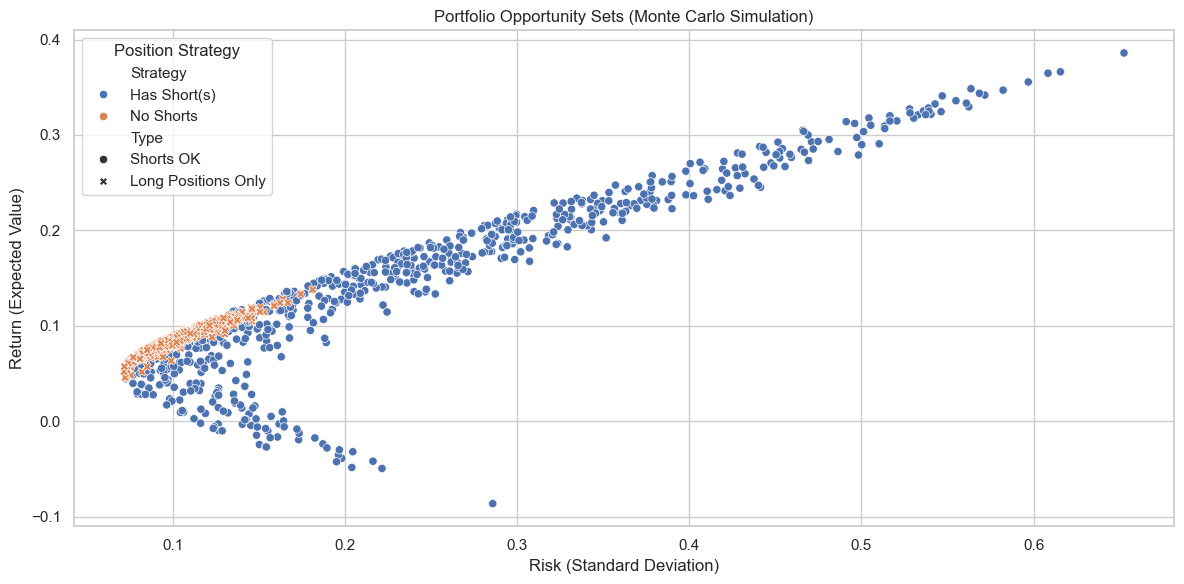

In [17]:
# ---- Step 7: Plot Results ----
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_all, x="Risk", y="Return", hue="Strategy", style="Type")
plt.title("Portfolio Opportunity Sets (Monte Carlo Simulation)")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return (Expected Value)")
plt.legend(title="Position Strategy")
plt.tight_layout()
plt.savefig("portfolio_optimization_montecarlo.png")
plt.show()